In [8]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt
import math
import sys


In [9]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')

if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")

In [9]:
os.chdir(prj_path)
!pwd

/home/rcabanas/work_java_crema/crema/CreMA


In [10]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"

In [11]:
sys.path.append(exp_folder)
from utilplots import *

In [19]:
preliminaryBinary = {
    "markovian_ev" : f"{res_folder}/2020-04-23-08-24-04_chain_markovian_ev.csv",
    "markovian_nonev" : f"{res_folder}/2020-04-23-12-56-12_chain_markovian_nonev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-04-23-11-06-42_chain_nonmarkovian_ev.csv",
    "nonmarkovian_nonev" :f"{res_folder}/2020-04-23-15-37-22_chain_nonmarkovian_nonev.csv"
}

## binary results with 5 seeds
binRes = {
    "markovian_ev" : f"{res_folder}/2020-04-26-16-37-58_chain_markovian_ev.csv",
    "nonmarkovian_ev" :f"{res_folder}/2020-04-27-22-28-04_chain_nonmarkovian_ev.csv"
}


#binResExo6 = {
#    "markovian_ev" : f"{res_folder}/2020-05-09-00-45-58_chain_markovian_ev.csv",
#    "nonmarkovian_ev" :f"{res_folder}/2020-05-10-17-16-38_chain_nonmarkovian_ev.csv"
#}

binResExo6 = {
    "markovian_ev" : f"{res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    #"nonmarkovian_ev" :f"{res_folder}/2020-05-10-18-30-05_chain_nonmarkovian_ev.csv"
    "nonmarkovian_ev": f"{res_folder}/2020-05-11-05-25-43_chain_nonmarkovian_ev.csv"
}

### fixed bug results
binResExo6 = {
    "markovian_ev" : f"{res_folder}/2020-05-10-18-28-51_chain_markovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-15-06-25-18_chain_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-16-06-06-14_chain_nonmarkovian_prec.csv"
}


terRes = {
    "markovian_ev" : f"{res_folder}/2020-04-27-07-17-45_chain_markovian_ev.csv",
    "nonmarkovian_ev":f"{res_folder}/2020-05-04-00-23-39_chain_nonmarkovian_ev.csv",
}

terbinRes = {
    "markovian_ev": f"{res_folder}/2020-05-04-16-23-18_chain_terbin_markovian_ev.csv",
    "nonmarkovian_ev" : f"{res_folder}/2020-05-05-17-23-26_chain_terbin_nonmarkovian_ev.csv",
}


hmmRes = {
    "markovian_ev": f"{res_folder}/2020-05-13-04-01-42_hmm_markovian_ev.csv",
    #"nonmarkovian_ev" : f"{res_folder}/2020-05-13-07-36-42_hmm_nonmarkovian_ev.csv",
    "nonmarkovian_ev": f"{res_folder}/2020-05-13-22-47-34_hmm_nonmarkovian_ev.csv",
    "nonmarkovian_prec" : f"{res_folder}/2020-05-17-04-27-29_hmm_nonmarkovian_prec.csv"

}


######
paths = terbinRes

res = {
    #"Chain 2-4":binRes, 
    "Chain 2-6":binResExo6,
    #"Chain (3,2)-6":terbinRes 
    "HMM 2-6":hmmRes
}


## Chain markovian case

query: $P(X_{N//2} | X_{N-1}, do(X_0))$

/home/rcabanas/work_java_crema/crema/CreMA/papers/pgm20/experiments/utilplots.py:35: RuntimeWarning: Mean of empty slice
  for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)


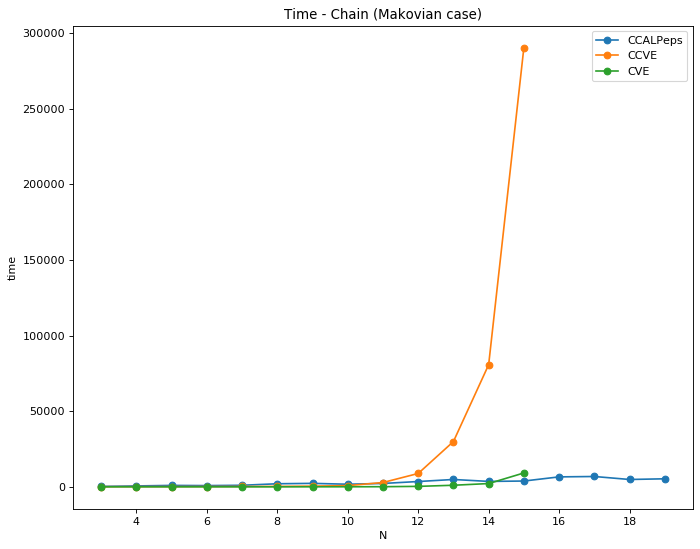

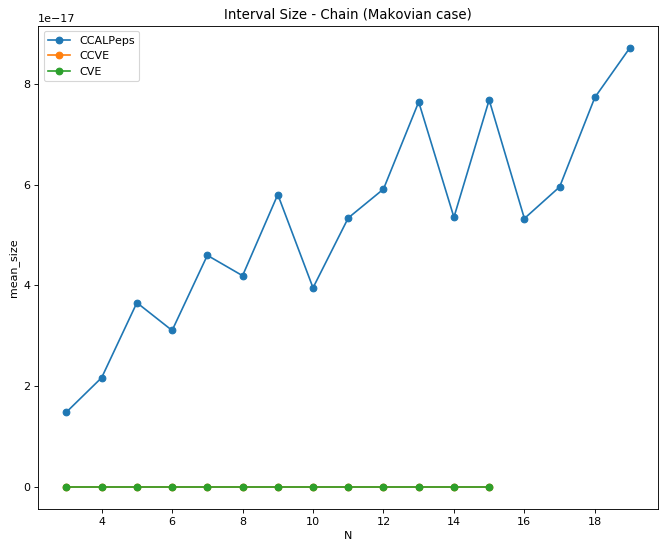

In [6]:
datafile = paths["markovian_ev"]
if datafile != None:
    results = pd.read_csv(datafile)
    plot_time(results, title="Time - Chain (Makovian case)")
    plot_size(results, title = "Interval Size - Chain (Makovian case)")

## Chain non-markovian case

query: $P(X_{N//2} | X_{N-1}, do(X_0))$

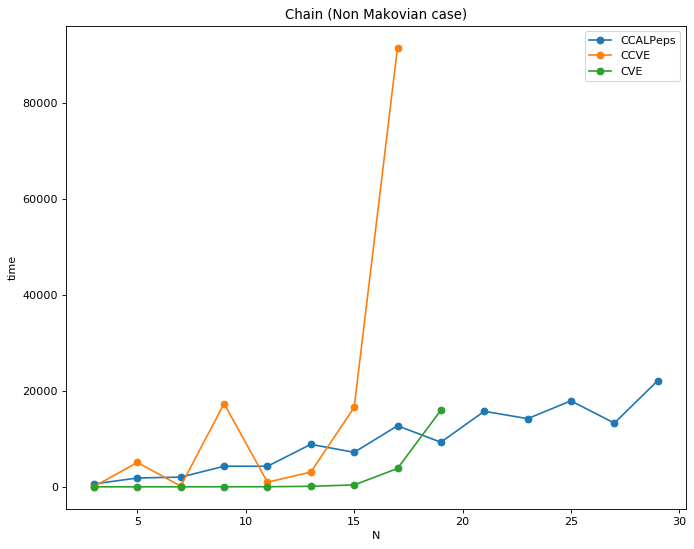

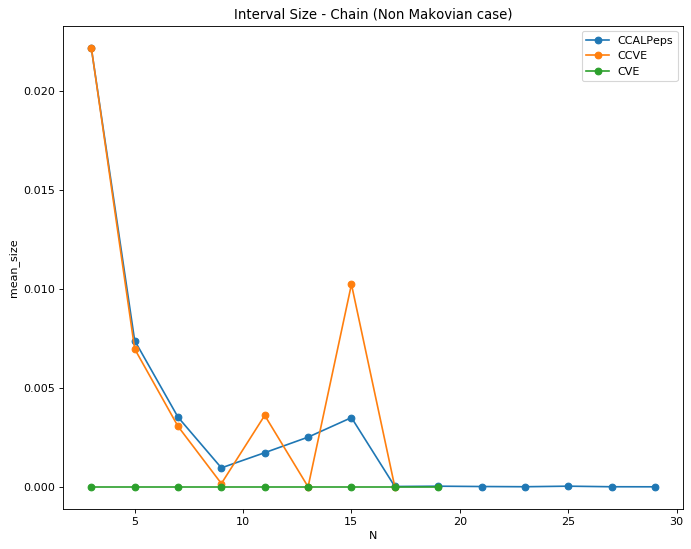

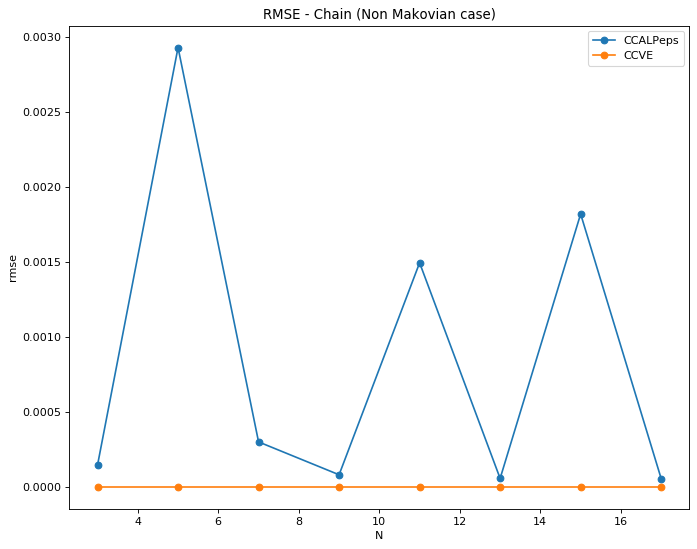

In [7]:
datafile = paths["nonmarkovian_ev"]
results = pd.read_csv(datafile)
plot_time(results, title = "Chain (Non Makovian case)")
plot_size(results, title = "Interval Size - Chain (Non Makovian case)")
plot_rmse(results, title = "RMSE - Chain (Non Makovian case)")


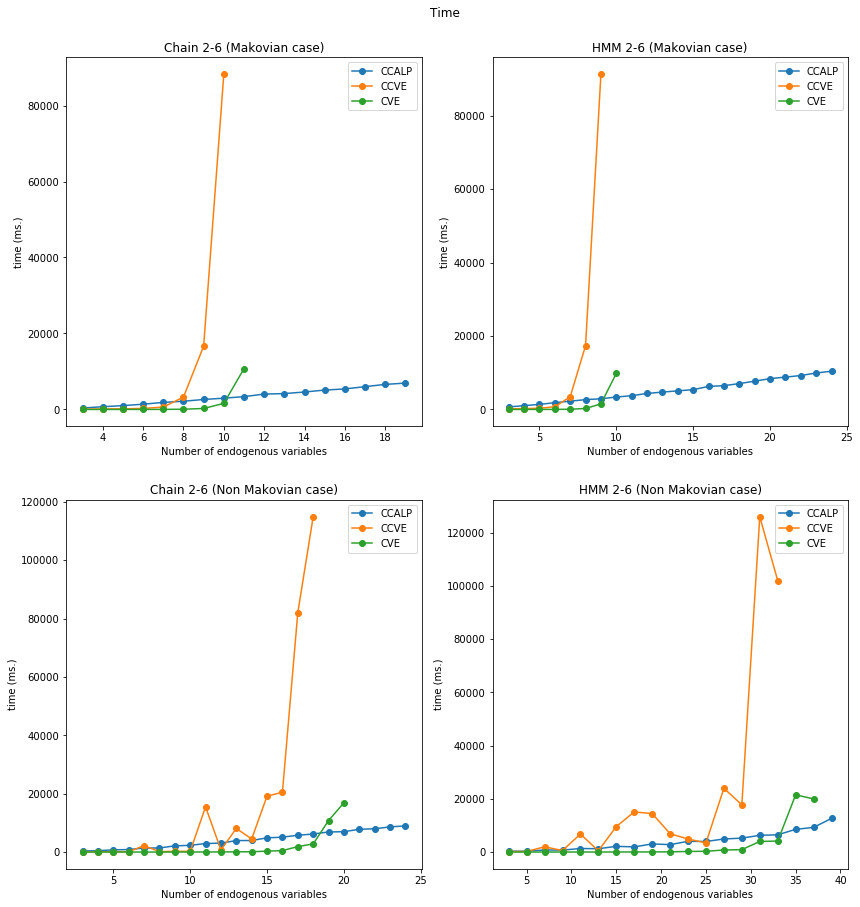

In [13]:
fig, axs = plt.subplots(2, len(list(res)), figsize=(14,14))

plot_func = plot_time
ylabel = "time (ms.)"
fig.suptitle("Time")
fig.subplots_adjust(top=0.93)
target = "target!=1"


for k,v in res.items():
    
    i = list(res).index(k)

    
    data = pd.read_csv(v["markovian_ev"]).filter("SEED>5000")
    #if "target" in data: data = data.query(target)

    plot_func(pd.read_csv(v["markovian_ev"]), 
              ax=axs[0,i],
              title=f"{k} (Makovian case)",
              xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_ev"])
    #if "target" in data: data = data.query(target)
    
    plot_func(data, 
          ax=axs[1,i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

    




/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


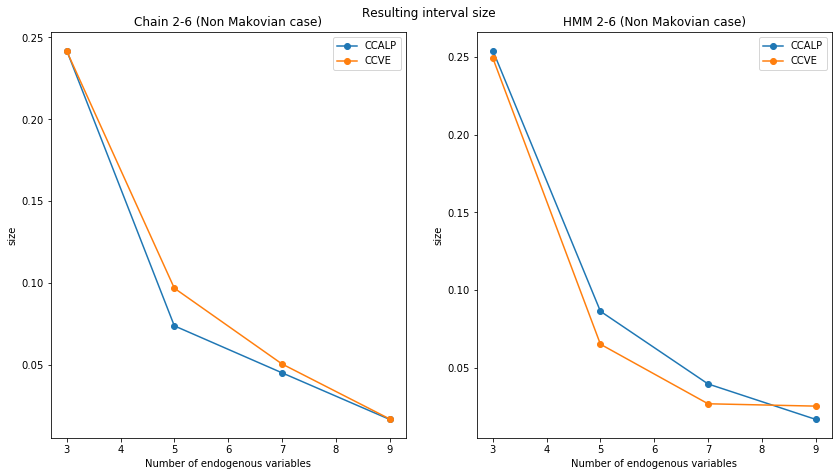

In [78]:
fig, axs = plt.subplots(1, len(list(res)), figsize=(14,7))

plot_func = plot_size
ylabel = "size"
fig.suptitle("Resulting interval size")
fig.subplots_adjust(top=0.93)
target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)

    
    #data = pd.read_csv(v["markovian_ev"])
    
    #plot_func(pd.read_csv(v["markovian_ev"]), ax=axs[0,i],title=f"{k} (Makovian case)", xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_prec"])
    
    plot_func(data, 
          ax=axs[i],
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)



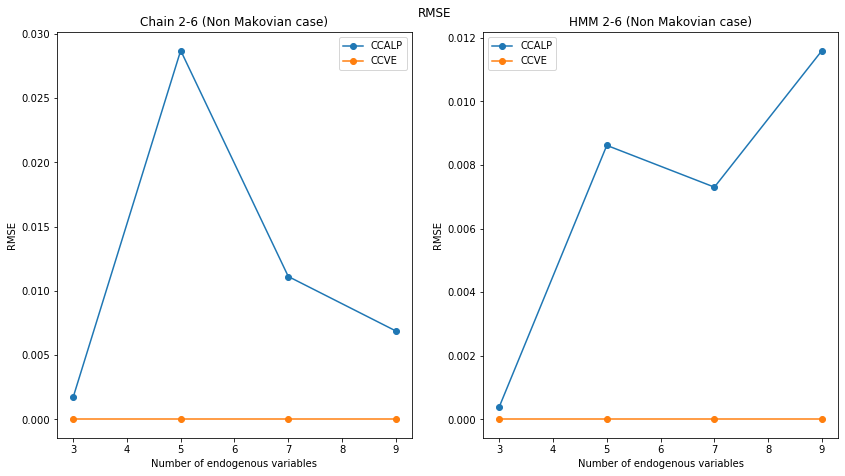

In [80]:
fig, axs = plt.subplots(1, len(list(res)), figsize=(14,7))

plot_func = plot_rmse
ylabel = "RMSE"
fig.suptitle("RMSE")
fig.subplots_adjust(top=0.93)

target = "target!=1"



for k,v in res.items():
    
    i = list(res).index(k)

    
    #data = pd.read_csv(v["markovian_ev"])

    #plot_func(pd.read_csv(v["markovian_ev"]), ax=axs[0,i], title=f"{k} (Makovian case)",xlabel="Number of endogenous variables", ylabel=ylabel)
    
    
    data = pd.read_csv(v["nonmarkovian_prec"])
    
    plot_func(data, 
          ax=axs[i], # [1,i]
          title=f"{k} (Non Makovian case)",
          xlabel="Number of endogenous variables", ylabel=ylabel)

In [20]:

def plot(data, x_column, y_column, series_column, transformation=None, ax=None, ylabel=None, xlabel=None, title=None):

    ax = ax or plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k').gca()

    data['method'] = data['method'].str.replace('eps','')
    
    if transformation is not None:
        data = transformation(data)
    
    data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=[y_column])    
    series = np.unique(data[series_column].to_numpy())
    for s in series:       
            data_s = data.query(f"{series_column}=='{s}'")
            x = np.unique(data_s[x_column].to_numpy())
            y = data_s.groupby(x_column).mean().filter(items=[y_column]).to_numpy()

            ax.plot(x, y, marker='o', label=s)
            ax.legend()

    ax.set_ylabel(ylabel or y_column)
    ax.set_xlabel(xlabel or x_column)

    ax.set_title(title or "")
    
    return ax


### transformations ###
def compute_mean_size(data):
    dataout = data.copy()
    dataout[f"mean_size"] = data.apply(lambda t : np.nanmean([t[k.replace("lower","upper")] - t[k]  
                                                        for k in t.to_dict().keys() if "lowerbound" in k]), axis=1)
    return dataout


def get_rmse_bounds(data):

    joincolumns = [v for v in data.columns if "time" not in v and "bound" not in v and "method" not in v][1:]
    # add the corresponding exact result to each method
    df = pd.merge(
        data.query("method!='CVE'"),
        data.query("method=='CCVE'"),#.filter([v for v in data.columns if v not in ["method", "time", "query_time"]]),
        on = joincolumns,
    )
    def rmse_bounds(t):
        if np.isnan(t["lowerbound0_y"]):
            return float("nan")

        errlow = [math.pow(t[k.replace("_x","_y")]- t[k],2) for k in t.to_dict().keys() if "lowerbound" in k]
        errupp = [math.pow(t[k.replace("_x","_y")]- t[k],2) for k in t.to_dict().keys() if "upperbound" in k]
        return np.sqrt(np.nansum(errlow+errupp))

    dataout = data.copy()
    df["rmse"] = df.apply(rmse_bounds, axis=1)
    df = df.rename(columns={"method_x":"method"}).filter(joincolumns + ["method","rmse"])
    return pd.merge(dataout, df, on=joincolumns + ["method"], how="outer")


####

def plot_time(data, *args, **kwargs):
    return plot(data, "N", "time", "method", *args, **kwargs)

def plot_size(data, *args, **kwargs):
    return plot(data, "N", "mean_size", "method", transformation = compute_mean_size, *args, **kwargs)

def plot_rmse(data, *args, **kwargs):
    return plot(data, "N", "rmse", "method", transformation = get_rmse_bounds, *args, **kwargs)

    

In [32]:
data =pd.read_csv(res["HMM 2-6"]["nonmarkovian_prec"], index_col=0)


No handles with labels found to put in legend.


9

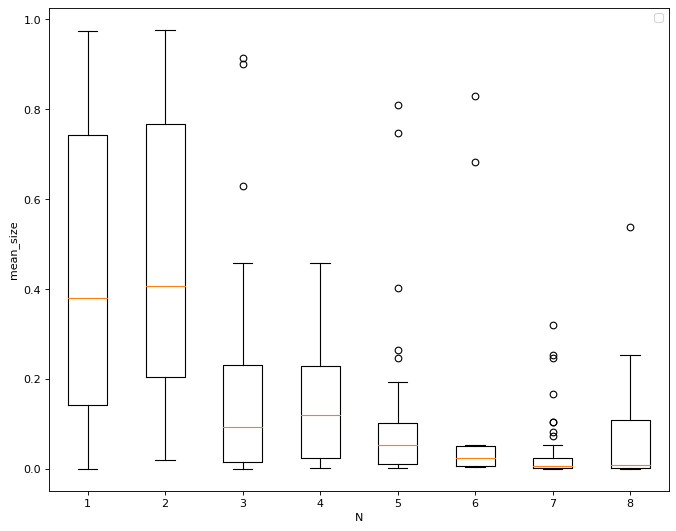

In [77]:
#def plot(data, x_column, y_column, series_column, transformation=None, ax=None, ylabel=None, xlabel=None, title=None):

x_column = "N"
y_column = "mean_size"
series_column = "method"
transformation = compute_mean_size
ax=None
ylabel=None
xlabel=None
title=None
###

ax = ax or plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k').gca()

data['method'] = data['method'].str.replace('eps','')

if transformation is not None:
    data = transformation(data)

data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=[y_column])    
series = np.unique(data[series_column].to_numpy())

X = np.unique(data[x_column].to_numpy())


data_plot = []
i = 0

for x in X:
    for s in series:       
        y = data.query(f"{series_column}=='{s}'").query(f"{x_column}=={x}").query(f"{y_column}>0.0001")
        y = y.filter(items=[y_column]).to_numpy()
        
        data_plot.append(y)


plt.boxplot([y.flatten().tolist() for y in data_plot])
ax.legend()

ax.set_ylabel(ylabel or y_column)
ax.set_xlabel(xlabel or x_column)

ax.set_title(title or "")

#return ax

x

In [73]:
data_plot = [y, y]

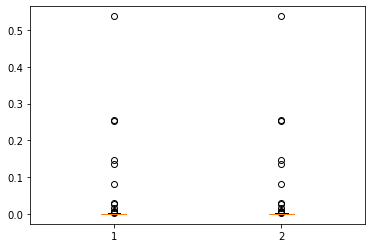

In [74]:
plt.boxplot([y.flatten().tolist() for y in data_plot])

plt.show()

In [59]:
np.hstack([y,y])

array([[0.        , 0.        ],
       [0.92992973, 0.92992973],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.97015205, 0.97015205],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.97750605, 0.97750605],
       [0.05016282, 0.05016282],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.1424036 , 0.1424036 ],
       [0.        , 0.        ],
       [0.79594901, 0.79594901],
       [0.        , 0.        ],
       [0.21839932, 0.21839932],
       [0.0439449 , 0.0439449 ],
       [0.        , 0.        ],
       [0.24884528, 0.24884528],
       [0.28182632, 0.28182632],
       [0.        , 0.        ],
       [0.08891025, 0.08891025],
       [0.81872991, 0.81872991],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.